In [2]:
# Import some libraries
import os
import numpy as np
import glob
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
 

In [11]:
# define dir
data_directory = 'C:/Users/mvmigem/Documents/data/project_1/plotting_df/'
stan_nc_c1 = pd.read_csv(data_directory + 'standard_c1_plot.csv')
ind_nc_c1 = pd.read_csv(data_directory + 'individualised_c1_plot.csv')
stan_oc_c1 = pd.read_csv(data_directory + 'standard_oc_c1_plot.csv')
ind_oc_c1 = pd.read_csv(data_directory + 'individualised_oc_c1_plot.csv')

localiser_c1 = pd.read_csv(data_directory + 'localiser_c1_plot.csv')
oc_p1 = pd.read_csv(data_directory + 'oc_p1_plot.csv')
oc_p3 = pd.read_csv(data_directory + 'oc_p3_plot.csv')

# truncate
max_length = .6
min_length = .1
stan_nc_c1 = stan_nc_c1[stan_nc_c1['times']< max_length]
ind_nc_c1 = ind_nc_c1[ind_nc_c1['times']< max_length]
stan_oc_c1 = stan_oc_c1[stan_oc_c1['times']< max_length]
ind_oc_c1 = ind_oc_c1[ind_oc_c1['times']< max_length]
stan_nc_c1 = stan_nc_c1[stan_nc_c1['times']> min_length]
ind_nc_c1 = ind_nc_c1[ind_nc_c1['times']> min_length]
stan_oc_c1 = stan_oc_c1[stan_oc_c1['times']> min_length]
ind_oc_c1 = ind_oc_c1[ind_oc_c1['times']> min_length]

localiser_c1 = localiser_c1[localiser_c1['times']< max_length]
oc_p1 = oc_p1[oc_p1['time']< max_length]
oc_p1 = oc_p1[oc_p1['time']> min_length]
oc_p1['time'] = oc_p1['time']*1000

oc_p3 = oc_p3[oc_p3['time']< max_length]
oc_p3 = oc_p3[oc_p3['time']> min_length]
oc_p3['time'] = oc_p3['time']*1000


# group dfs
dfs = [stan_nc_c1,ind_nc_c1,stan_oc_c1,ind_oc_c1]
# turn into ms
for df in dfs:
    df['times'] = df['times']*1000

In [12]:
stan_df = pd.read_csv('C:/Users/mvmigem/Documents/data/project_1/compiled_dataframes/c1_long_df.csv')
oc_fix_df = pd.read_csv('C:/Users/mvmigem/Documents/data/project_1/compiled_dataframes/c1_oc_fix_df.csv')
oc_var_df = pd.read_csv('C:/Users/mvmigem/Documents/data/project_1/compiled_dataframes/c1_oc_var_df.csv')
oc_var_df = pd.read_csv('C:/Users/mvmigem/Documents/data/project_1/compiled_dataframes/c1_oc_var_df.csv')
oc_p1_df = pd.read_csv('C:/Users/mvmigem/Documents/data/project_1/compiled_dataframes/p1_oc_df.csv')
oc_n1_df = pd.read_csv('C:/Users/mvmigem/Documents/data/project_1/compiled_dataframes/n1_oc_df.csv')
oc_p3b_df = pd.read_csv('C:/Users/mvmigem/Documents/data/project_1/compiled_dataframes/p3b_oc_df.csv')

In [5]:
"""
***Aestetics***
"""
# load color palette
my_palette = sns.color_palette().as_hex()
sns.color_palette().as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [ ]:
def offset_swarmplot(ax, offset, axis='x'):
    # Offset swarmplot points by altering their offsets
    for collection in ax.collections:
        offsets = collection.get_offsets()
        if axis == 'x':
            new_offsets = np.array([[x + offset, y] for x, y in offsets])
        else:
            new_offsets = np.array([[x, y + offset] for x, y in offsets])
        collection.set_offsets(new_offsets)

IndexError: index 2 is out of bounds for size 2

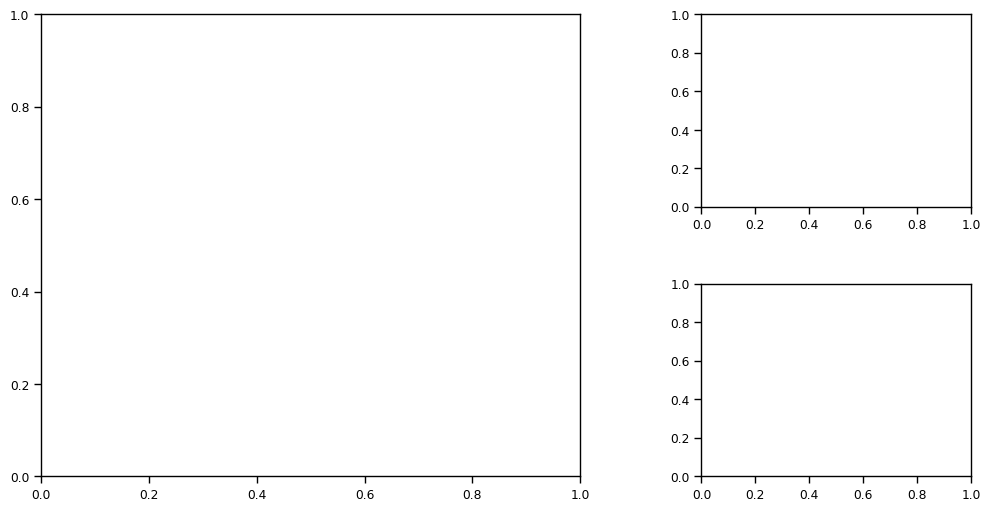

In [ ]:
""" 
Main C1 analysis plotting
"""
dfs = [stan_nc_c1,stan_oc_c1,ind_nc_c1,ind_oc_c1,]
fig, axes = plt.subplots(3,2,figsize=(16, 16),sharey=False,sharex=False)
sns.set_context("paper")

line_colours1= ['#219EBC','#FFB703']
line_colours2 = ['#8ECAE6','#FB8500',]

# Line plots
for i, ax in enumerate(axes.flat[[0,1,2,3]]):

    sns.lineplot(data=dfs[i][dfs[i]['visual_field']=='up'],
            x='times',y='amp',
            hue='attention',style='expectation',
            errorbar='se',ax=ax,
            linewidth=3, palette=line_colours1)
    
    sns.lineplot(data=dfs[i][dfs[i]['visual_field']=='down'],
            x='times',y='amp',
            hue='attention',style='expectation',
            errorbar='se',ax=ax,
            linewidth=3, palette=line_colours2)
    ax.set_xlabel('time (ms)',fontdict={'family': 'Segoe UI', 'weight' : 'semibold','size':26})

# Legend
# Collect handles and labels from the first axis
handles, labels = axes.flat[0].get_legend_handles_labels()
to_pop = [3,3,3]
for i in to_pop:
    handles.pop(i)
    labels.pop(i)
# Add a single legend to the figure

legend = fig.legend(handles, labels, ncol=1, bbox_to_anchor=(1,1),prop={'size': 18, 'family': 'Segoe UI'})
legend.texts[0].set_text("Attention UFV")
legend.texts[1].set_text("peripheral")
legend.texts[2].set_text("central")
legend.texts[3].set_text("Attention LFV")
legend.texts[4].set_text("peripheral")
legend.texts[5].set_text("central")
legend.texts[6].set_text("Expectation")
legend.texts[0].set_fontweight("semibold")
legend.texts[3].set_fontweight("semibold")
legend.texts[6].set_fontweight("semibold")

# highlight and lines
highlight_start = [79,79,50,50]
highlight_end = [99,99,100,100]

axes[0,0].axvline(x=89,ls='--',lw=1.5, c='black' )
axes[0,1].axvline(x=89,ls='--',lw=1.5, c='black' )

for i, ax in enumerate(axes.flat[[0,1,2,3]]):
    # Add a highlighting bar (vertical span)
    ax.axvspan(highlight_start[i], highlight_end[i], color='gray', alpha=0.3, label='Highlight')

# Labels
axes[0,0].set_xticklabels([])
axes[0,0].set_xlabel('')
axes[0,1].set_xticklabels([])
axes[0,1].set_xlabel('')
axes[0,1].set_xlabel('')
axes[2,0].set_xlabel('')
axes[2,1].set_xlabel('expectation',fontdict={'family': 'Segoe UI', 'weight' : 'semibold','size':26})

for ax in [axes[0,1],axes[1,0],axes[1,1]]:
    ax.sharey(axes[0,0])

# Bar + scatterplot
sns.barplot(stan_df[stan_df['visual_field'] == 'up'],
            y='tailored_amp',
            x='expectation',
            hue='attention',
            edgecolor= 'none', 
            palette= line_colours1,
            errorbar='se', 
            errwidth= 3, 
            order= ['regular','odd'],
            capsize=.08,
            width=.3, 
            linewidth=0.3,
            ax = axes[2,0])
sns.stripplot(data=stan_df[stan_df['visual_field'] == 'up'],
              y='tailored_amp',
              x='expectation',
              hue='attention',
              dodge=True,
              palette=line_colours1,
              order=['regular', 'odd'],
              ax=axes[2,0],
              jitter= 0.05,
              size=7,
              alpha=1) 

sns.barplot(stan_df[stan_df['visual_field'] == 'down'],y='tailored_amp',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours2,
            errorbar='se', errwidth= 3,
            capsize=.08,width=.3, linewidth=0.3,ax = axes[2,0])
sns.stripplot(data=stan_df[stan_df['visual_field'] == 'down'],
              y='tailored_amp',
              x='expectation',
              hue='attention',
              dodge=True,  # Prevents overlapping
              palette=line_colours2,
              order=['regular', 'odd'],
              ax=axes[2,0],
              jitter= 0.05,
              size=7,  # Adjust point size
              alpha=1) 

sns.barplot(oc_var_df[oc_var_df['visual_field'] == 'up'],y='baseline_corrected',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours1,
            errorbar='se', errwidth= 3, order= ['regular','odd'],
            capsize=0.08,width=.3, linewidth=0.3,ax = axes[2,1])
sns.stripplot(oc_var_df[oc_var_df['visual_field'] == 'up'],
              y='baseline_corrected',
              x='expectation',
              hue='attention',
              dodge=True,  # Prevents overlapping
              palette=line_colours1,
              order=['regular', 'odd'],
              ax=axes[2,1],
              jitter= 0.05,
              size=7,  # Adjust point size
              alpha=1,)
sns.barplot(oc_var_df[oc_var_df['visual_field'] == 'down'],y='baseline_corrected',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours2,
            errorbar='se', errwidth= 3,
            capsize=.08,width=.3, linewidth=0.3,ax = axes[2,1])
sns.stripplot(oc_var_df[oc_var_df['visual_field'] == 'down'],
              y='baseline_corrected',
              x='expectation',
              hue='attention',
              dodge=True,  # Prevents overlapping
              palette=line_colours2,
              order=['regular', 'odd'],
              ax=axes[2,1],
              jitter= 0.05,
              size=7,  # Adjust point size
              alpha=1) 

axes[2,1].sharey(axes[2,0])

for i, ax in enumerate(axes.flat):
    ax.axhline(y=0, lw=1, c='black' )
    ax.axhline(y=0, lw=1, c='black' )
    ax.legend_.remove() 
    # Change the size of the numbers on the axes
    ax.tick_params(axis='x', labelsize=18)  # Font size for x-axis numbers
    ax.tick_params(axis='y', labelsize=18) 

for ax in [axes[0,1],axes[1,1],axes[2,0],axes[2,1]]:
    ax.set_ylabel(None)
for ax in [axes[1,0],axes[0,0],axes[2,0]]:
    ax.set_ylabel('µV', fontdict={'family': 'Segoe UI','size':20})

for ax in [axes[2,0],axes[2,1]]:
    ax.set_xlabel('')
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelsize=18) 

sns.despine(offset=10, trim=True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
fig.savefig('fig_c1_main.png')

In [ ]:
fig, axes = plt.subplots(2,figsize=(10, 10),sharey=True,sharex=False)

sns.barplot(stan_df[stan_df['visual_field'] == 'up'],y='tailored_amp',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours1,
            errorbar='se', errwidth= 3, order= ['regular','odd'],
            capsize=.1,width=.4, linewidth=0.5,ax = axes[0])
sns.swarmplot(data=stan_df[stan_df['visual_field'] == 'up'],
              y='tailored_amp',
              x='expectation',
              hue='attention',
              dodge=True,  # Prevents overlapping
              palette=line_colours1,
              order=['regular', 'odd'],
              ax=axes[0],
              size=9,  # Adjust point size
              alpha=0.7) 

# sns.violinplot(data=stan_df[stan_df['visual_field'] == 'up'], x="expectation", y="tailored_amp", hue="attention",
#                split=True, inner="quart", fill=False,
#                palette=line_colours1,ax=axes[0])

# sns.boxplot(stan_df[stan_df['visual_field'] == 'down'],x='tailored_amp',y='expectation',hue='attention', palette= line_colours2,
#             width=.4, linewidth=0.5,ax = axes[0])

sns.boxplot(oc_var_df[oc_var_df['visual_field'] == 'up'],y='baseline_corrected',x='expectation',hue='attention', palette= line_colours1,
            order= ['regular','odd'],
            width=.2, linewidth=0.5,ax = axes['bottom'])
sns.swarmplot(oc_var_df[oc_var_df['visual_field'] == 'up'],
              y='baseline_corrected',
              x='expectation',
              hue='attention',
              dodge=2,  # Prevents overlapping
              palette=line_colours1,
              order=['regular', 'odd'],
              ax=axes[1],
              size=9,  # Adjust point size
              alpha=0.7) 
# sns.boxplot(oc_var_df[oc_var_df['visual_field'] == 'down'],x='baseline_corrected',y='expectation',hue='attention', palette= line_colours2,
#             width=.4, linewidth=0.5,ax = axes[1])

sns.despine(offset=10, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 1])
plt.show()

In [ ]:
""" 
Localiser erp plotting
"""
import matplotlib.lines as mlines

fig, axes = plt.subplots(1, figsize=(16, 10), sharey=True)

line_colours = [my_palette[0],my_palette[2],my_palette[1],my_palette[3]]

sns.set_context("paper")

sns.lineplot(data=localiser_c1, x='times', y='amp',hue='position',
             palette = line_colours ,ax=axes, linewidth=4,
             errorbar = 'se')

legend = plt.legend(facecolor= 'white',prop={'size': 28, 'family': 'Segoe UI'})

sns.despine(offset=10, trim=True)
for i in range(1):
    axes.axhline(y=0, lw=1, c='black' )
    axes.axvline(x=.086,ls='--',lw=1.5, c='black' )
    axes.set_ylabel('µV', fontdict={'family': 'Segoe UI','size':30})
    axes.set_xlabel('time (s)',fontdict={'family': 'Segoe UI', 'weight' : 'semibold','size':30})

# Change the size of the numbers on the axes
axes.tick_params(axis='x', labelsize=22)  # Font size for x-axis numbers
axes.tick_params(axis='y', labelsize=22) 
# Add a highlighting bar (vertical span)
highlight_start = .06
highlight_end = .09
axes.axvspan(highlight_start, highlight_end, color='gray', alpha=0.3, label='Highlight')

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the figure
plt.show()
fig.savefig('localiser.png')

In [ ]:
peak_properties = pd.read_csv(r'C:\Users\mvmigem\Documents\data\project_1\compiled_dataframes\c1_peak_properties.csv')

C:\Users\mvmigem\AppData\Local\Temp\ipykernel_21672\2446264100.py:36: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  sns.barplot(oc_p1_df,y='yhat',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours1,
C:\Users\mvmigem\AppData\Local\Temp\ipykernel_21672\2446264100.py:44: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  sns.barplot(oc_n1_df,y='yhat',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours1,
C:\Users\mvmigem\AppData\Local\Temp\ipykernel_21672\2446264100.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


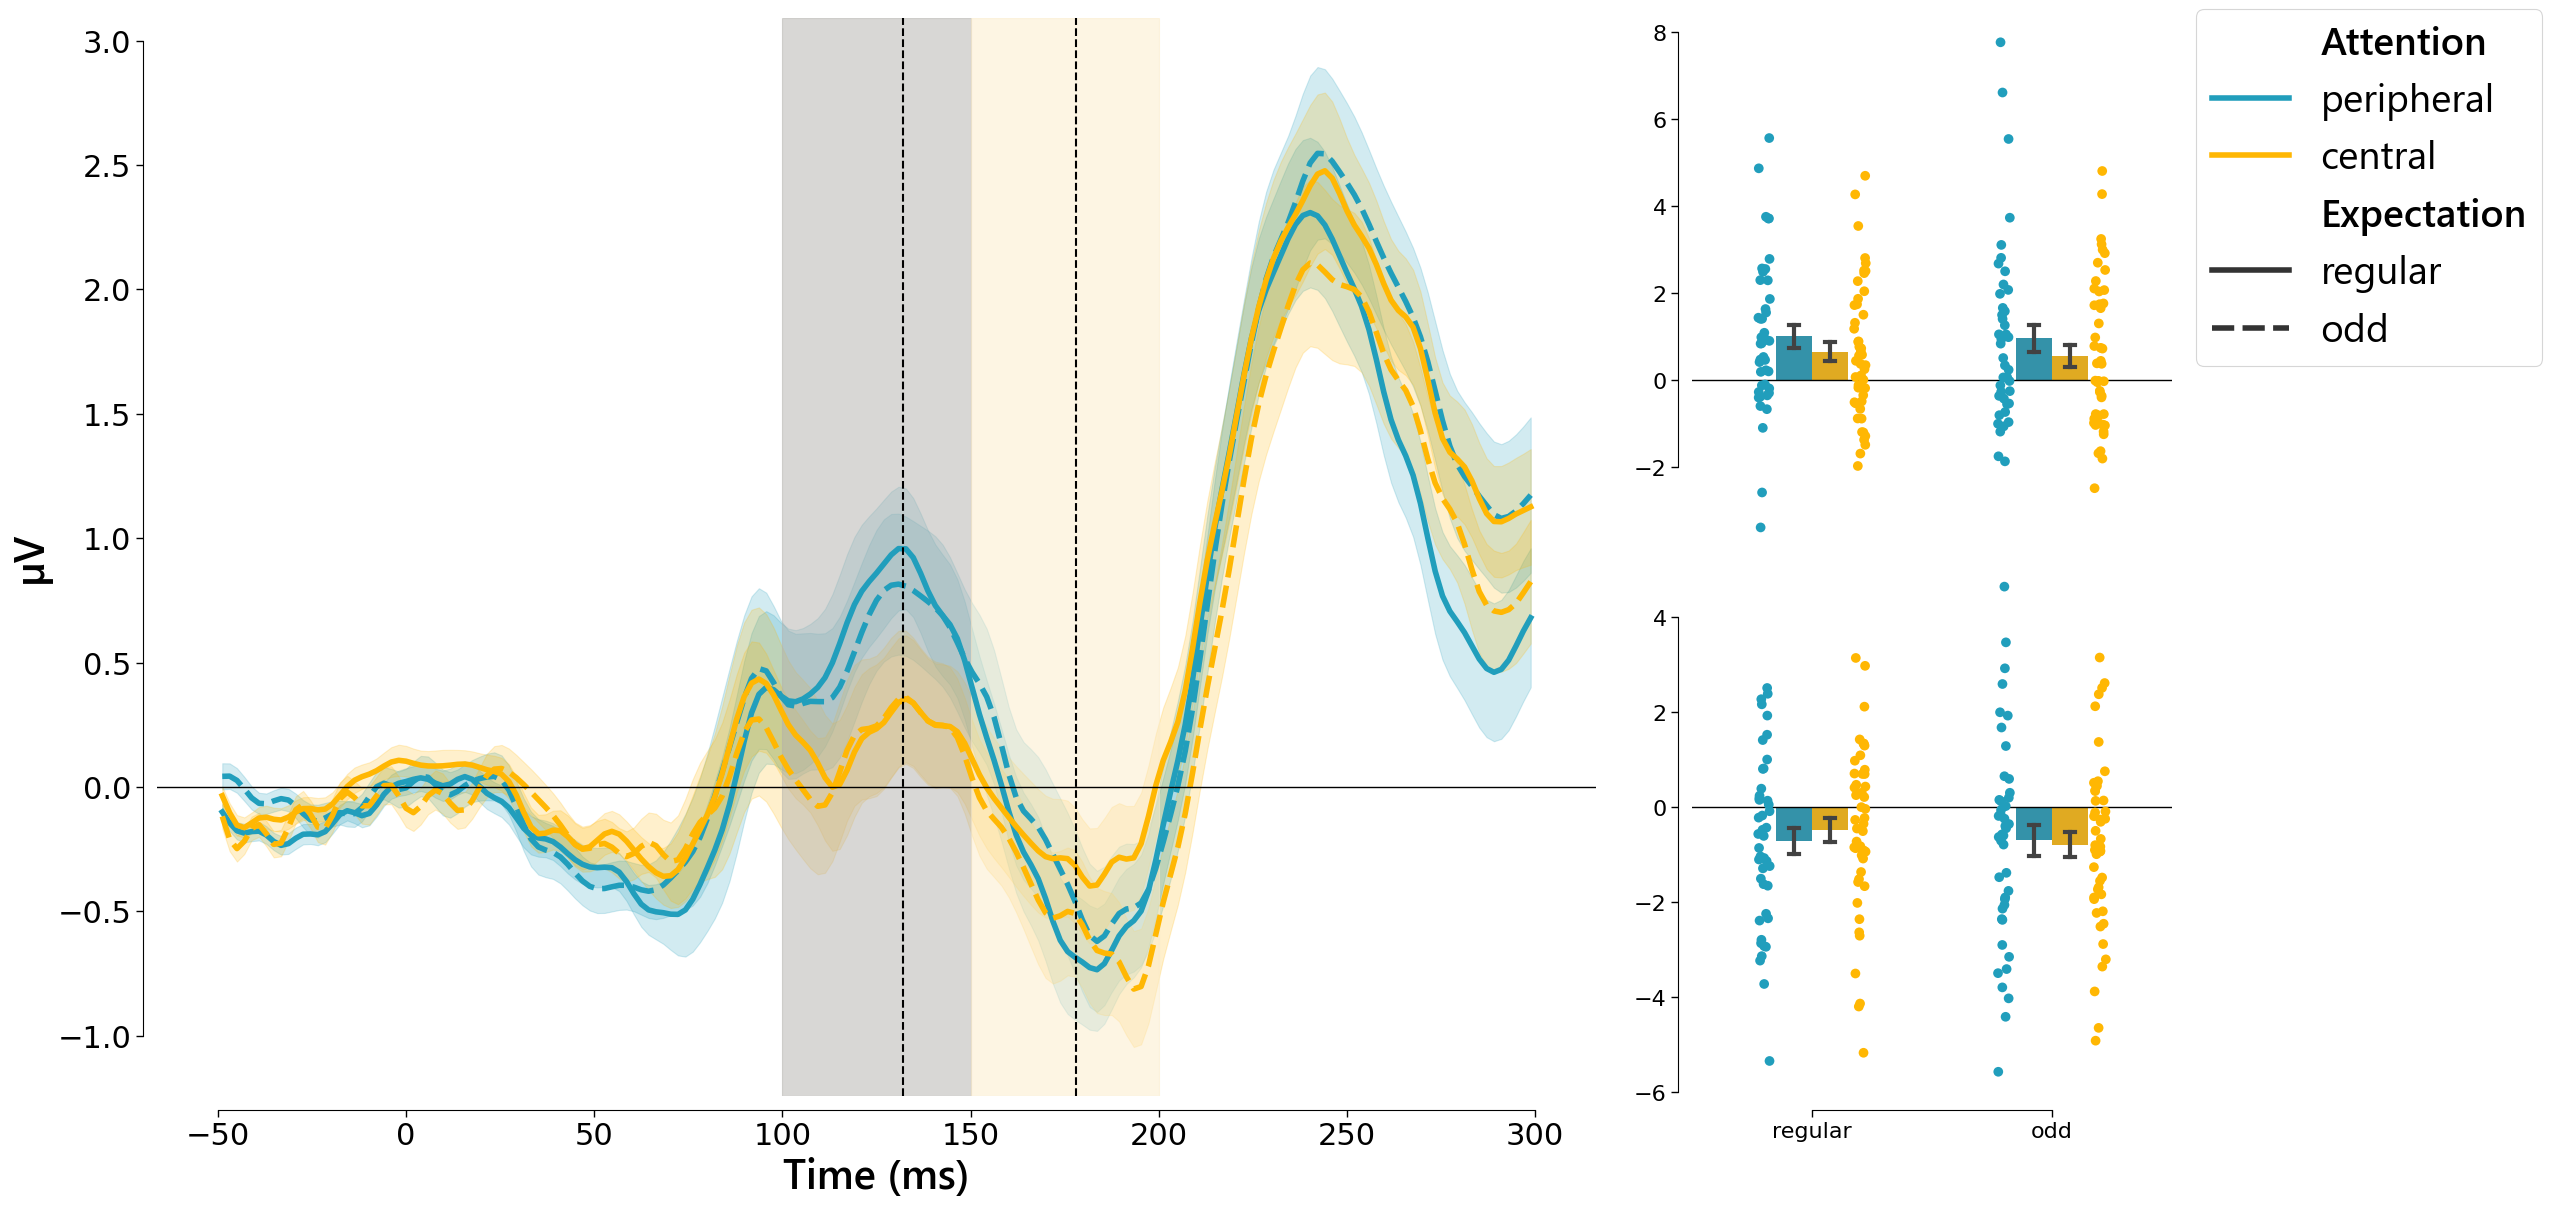

In [9]:
""" 
P1 and N1 plots
"""
# dfs = [stan_nc_c1,ind_nc_c1]
dfs = [oc_p1_df,oc_n1_df]
fig, axes = plt.subplot_mosaic(
    [["main", "top"],
     ["main", "bottom"]],
    figsize=(26, 14),
    gridspec_kw={
        "width_ratios": [3,1],
        "height_ratios": [1, 1],
        "wspace": 0.1,
        "hspace": 0.02
    }
)
sns.set_context("paper")

line_colours1= ['#219EBC','#FFB703']
line_colours2 = ['#8ECAE6','#FB8500',]

sns.lineplot(data=oc_p1, x='time', y='yhat',
             hue='attention',style='expectation',
             palette = line_colours1 ,ax=axes['main'], linewidth=4,
             errorbar = 'se')

handles, labels = axes['main'].get_legend_handles_labels()
legend = fig.legend(handles, labels, ncol=1, bbox_to_anchor=(1.05, .9),prop={'size': 28, 'family': 'Segoe UI'})
legend.texts[0].set_text("Attention")
legend.texts[1].set_text("peripheral")
legend.texts[2].set_text("central")
legend.texts[3].set_text("Expectation")
legend.texts[0].set_fontweight("semibold")
legend.texts[3].set_fontweight("semibold")

sns.barplot(oc_p1_df,y='yhat',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours1,
            errorbar='se',         errwidth= 3, 
            order= ['regular','odd'],
            capsize=.08,
            width=.3, 
            linewidth=0.3,
            ax = axes['top'])

sns.barplot(oc_n1_df,y='yhat',x='expectation',hue='attention',edgecolor= 'none', palette= line_colours1,
            errorbar='se',         errwidth= 3, 
            order= ['regular','odd'],
            capsize=.08,
            width=.3, 
            linewidth=0.3,
            ax = axes['bottom'])

sns.stripplot(oc_p1_df,y='yhat',
              x='expectation',
              hue='attention',
              dodge=True,  # Prevents overlapping
              palette=line_colours1,
              order=['regular', 'odd'],
              jitter= 0.05,
              size=7,  # Adjust point size
              alpha=1,
              ax = axes['top'])

sns.stripplot(oc_n1_df,y='yhat',
              x='expectation',
              hue='attention',
              dodge=True,  # Prevents overlapping
              palette=line_colours1,
              order=['regular', 'odd'],
              jitter= 0.05,
              size=7,  # Adjust point size
              alpha=1,
              ax = axes['bottom'])

# Adjust legend position if needed
if axes['bottom'].get_legend() is not None:
    axes['bottom'].get_legend().remove()
 
if axes['top'].get_legend() is not None:
    axes['top'].get_legend().remove()
 
if axes['main'].get_legend() is not None:
    axes['main'].get_legend().remove()
 
axes['main'].axhline(y=0, lw=1, c='black' ) 
axes['top'].axhline(y=0, lw=1, c='black' )
axes['bottom'].axhline(y=0, lw=1, c='black' )
# Add a highlighting bar (vertical span)
highlight_start = 100
highlight_mid = 150
highlight_end = 200

axes['main'].axvspan(highlight_start, highlight_mid, color="#B3B1AC", alpha=0.5, label='Highlight 2')
axes['main'].axvspan(highlight_mid, highlight_end, color='#FCECC9', alpha=0.5, label='Highlight 2')

axes['main'].axvline(x=132,ls='--',lw=1.5, c='black' )
axes['main'].axvline(x=178,ls='--',lw=1.5, c='black' )

axes['main'].set_ylabel('µV', fontdict={'family': 'Segoe UI', 'weight': 'semibold','size':30})
axes['main'].set_xlabel('Time (ms)', fontdict={'family': 'Segoe UI', 'weight': 'semibold','size':30})
axes['top'].set_ylabel('')
axes['bottom'].set_ylabel('',labelpad=0)
axes['top'].set_xlabel('',labelpad=0)
axes['bottom'].set_xlabel('',labelpad=0)


# Change the size of the numbers on the axes
axes['main'].tick_params(axis='x', labelsize=22)  # Font size for x-axis numbers
axes['main'].tick_params(axis='y', labelsize=22) 
axes['top'].tick_params(axis='x', labelsize=16)  # Font size for x-axis numbers
axes['bottom'].tick_params(axis='x', labelsize=16)  # Font size for x-axis numbers
axes['top'].tick_params(axis='y', labelsize=16) 
axes['bottom'].tick_params(axis='y', labelsize=16) 

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()
fig.savefig('fig_c1_main.png')

C:\Users\mvmigem\AppData\Local\Temp\ipykernel_21672\204249771.py:42: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 3}` instead.

  bar = sns.barplot(data=oc_p3b_df, y='P3b', x='expectation', hue='attention',


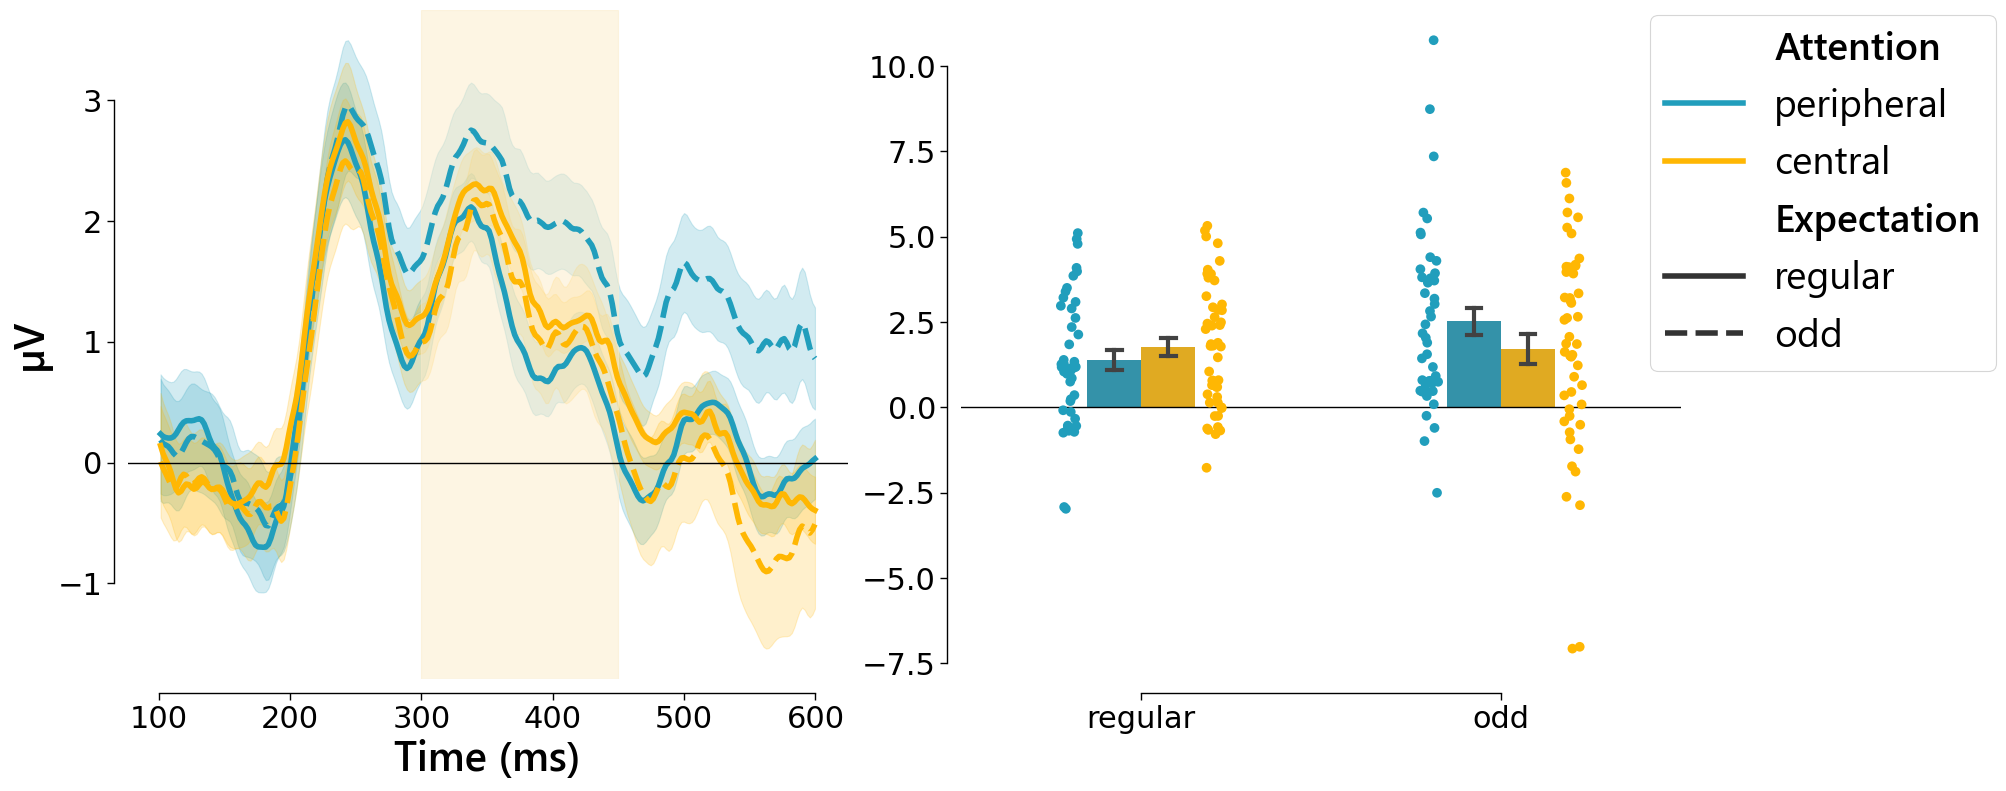

In [14]:
""" 
P1 rERP plotting
"""
import matplotlib.lines as mlines

fig, axes = plt.subplots(1,2, figsize=(20, 8), sharey=False)

line_colours1= ['#219EBC','#FFB703']
line_colours2 = ['#8ECAE6','#FB8500']

sns.set_context("paper")

sns.lineplot(data=oc_p3, x='time', y='P3b',
             hue='attention',style='expectation',
             palette = line_colours1 ,ax=axes[0], linewidth=4,
             errorbar = 'se')

handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, ncol=1, bbox_to_anchor=(1.01, 1),prop={'size': 28, 'family': 'Segoe UI'})
legend.texts[0].set_text("Attention")
legend.texts[1].set_text("peripheral")
legend.texts[2].set_text("central")
legend.texts[3].set_text("Expectation")
legend.texts[0].set_fontweight("semibold")
legend.texts[3].set_fontweight("semibold")

axes[0].axhline(y=0, lw=1, c='black' )
axes[0].set_ylabel('µV', fontdict={'family': 'Segoe UI', 'weight': 'semibold','size':30})
axes[0].set_xlabel('Time (ms)', fontdict={'family': 'Segoe UI', 'weight': 'semibold','size':30})
axes[0].legend_.remove() 
# Change the size of the numbers on the axes
axes[0].tick_params(axis='x', labelsize=22)  # Font size for x-axis numbers
axes[0].tick_params(axis='y', labelsize=22) 

# Add a highlighting bar (vertical span)
highlight_start = 100
highlight_mid = 300
highlight_end = 450

axes[0].axvspan(highlight_mid, highlight_end, color='#FCECC9', alpha=0.5, label='Highlight 2')

bar = sns.barplot(data=oc_p3b_df, y='P3b', x='expectation', hue='attention',
                 edgecolor='none', palette=line_colours1,
                 errorbar='se', errwidth=3, 
                 order=['regular','odd'],
                 capsize=.08,
                 width=.3,  # Adjusted width
                 linewidth=0.3,
                 ax=axes[1])

sns.stripplot(oc_p3b_df,y='P3b',
              x='expectation',
              hue='attention',
              dodge=True,  # Prevents overlapping
              palette=line_colours1,
              order=['regular', 'odd'],
              jitter= 0.05,
              size=7,  # Adjust point size
              alpha=1,
              ax = axes[1])
# Adjust x-axis limits to center the bars
axes[1].set_xlim(-0.5, 1.5)  # For 2 categories (regular at 0, odd at 1)
axes[1].axhline(y=0, lw=1, c='black' )
# OR alternatively, use matplotlib's autoscale with some padding
axes[1].margins(x=0.2)  # Add 20% padding on both sides

# Customize appearance
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].tick_params(axis='both', labelsize=22)

# Adjust legend position if needed
if axes[1].get_legend() is not None:
    axes[1].get_legend().remove()
 
# Adjust layout to prevent overlap
sns.despine(offset=10, trim=True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
# Show the figure
plt.show()
fig.savefig('localiser.png')